# Starting workbook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# What is the most commonly awarded gender and birth country?

In [3]:
#Loading data for nobel prize
df_nobel = pd.read_csv("nobel.csv")


#Most commonly awarded gender and birth country
top_gender = df_nobel["sex"].value_counts().index[0]

top_country = df_nobel["birth_country"].value_counts().index[0]

print(f'The top gender is {top_gender} ,and  the top country is the {top_country}')

The top gender is Male ,and  the top country is the United States of America


# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [11]:
# Creating a column for US-born winners
df_nobel["usa_born_winner"] = df_nobel["birth_country"] == "United States of America"

#Column for decade
df_nobel["decade"] = (np.floor(df_nobel["year"]/10)*10).astype(int)

#Proportion winners born in th US by decade
prop_usa_winners = df_nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

#Decade with the highest proportion of US_born winners
max_decade_usa = prop_usa_winners[prop_usa_winners["usa_born_winner"] == prop_usa_winners["usa_born_winner"].max()]["decade"].values[0]

print(f'The decade with highest proportion of US_born nobel prize winners is the: {max_decade_usa}')

The decade with highest proportion of US_nobel prize winners is the: 2000


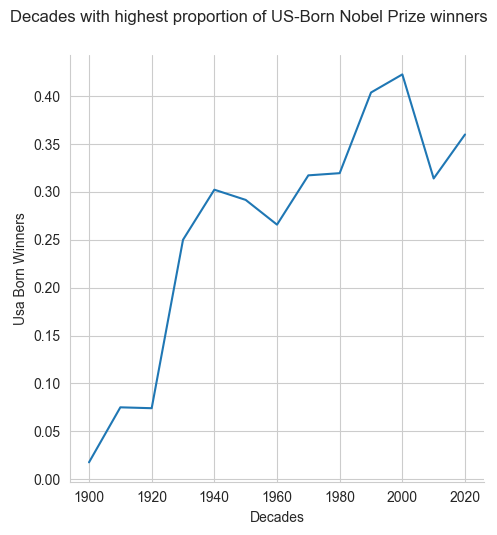

In [23]:
#Creating optional visualization for results
sns.set_style("whitegrid")
g=sns.relplot(x="decade",y="usa_born_winner", kind="line", data=prop_usa_winners)
g.fig.suptitle("Decades with highest proportion of US-Born Nobel Prize winners", y=1.06)
g.set(xlabel="Decades",ylabel="Usa Born Winners")
plt.show()